Different approach to the problem at hand, tried to retrieve the data from Kaggle, Following code consists of retreiving the data from kaggle to current drive so that it can be used accordingly.

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [17]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import zipfile                                               ### Images of cats and dogs are extracted fromc ats vs dog dataset
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [21]:
!kaggle datasets download -d alessiocorrado99/animals10 -p /content/neither --unzip #### Images for Neither class ar extracted from Animals 10 database



 99% 581M/586M [00:07<00:00, 207MB/s]
100% 586M/586M [00:07<00:00, 82.9MB/s]


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
!rm -r /content/neither/raw-img/cane

In [24]:

!mkdir -p /content/train/neither
!mkdir -p /content/test/neither

!mv /content/neither/raw-img/*/*.jpg /content/train/neither

In [42]:
import os
import random
import shutil

train_folder = '/content/train/neither'                             ### Splitting train and test
test_folder = '/content/test/neither'

image_files = os.listdir(train_folder)
random.shuffle(image_files)

test_files = image_files[:479]

for file in test_files:
    shutil.move(os.path.join(train_folder, file), test_folder)

In [54]:
import tensorflow as tf
from tensorflow import keras
### Train and test data generation
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42
)

# Retrieve class names from the dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Convert integer labels to one-hot encoded format
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=False  # No need to shuffle validation dataset
)

# Convert integer labels to one-hot encoded format
validation_ds = validation_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))



Found 21000 files belonging to 3 classes.
Found 5479 files belonging to 3 classes.


In [45]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model 
# 2 class classifier between cat and dog for initial test 

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 81s 104ms/step - loss: 1.1071 - accuracy: 0.6342 - val_loss: 0.5836 - val_accuracy: 0.6812
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5181 - accuracy: 0.7491 - val_loss: 0.4919 - val_accuracy: 0.7758
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4527 - accuracy: 0.7871 - val_loss: 0.4929 - val_accuracy: 0.7732
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3787 - accuracy: 0.8321 - val_loss: 0.8918 - val_accuracy: 0.5330
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3304 - accuracy: 0.8548 - val_loss: 0.7582 - val_accuracy: 0.6574
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2481 - accuracy: 0.8957 - val_loss: 1.1548 - val_accuracy: 0.6714
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1735 - accuracy: 0.9312 - val_loss: 0.6391 - val_ac

###### Seems like it works, move on to 3 class classifier using softmax now

## MODEL 2 

In [55]:
# create CNN model2
num_classes = 3
model2 = Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Flatten())

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(num_classes,activation='softmax'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2_history = model2.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
657/657 [==============================] - 74s 106ms/step - loss: 0.7695 - accuracy: 0.5715 - val_loss: 0.5434 - val_accuracy: 0.5795
Epoch 2/10
657/657 [==============================] - 70s 106ms/step - loss: 0.4516 - accuracy: 0.6599 - val_loss: 0.4785 - val_accuracy: 0.6100
Epoch 3/10
657/657 [==============================] - 69s 105ms/step - loss: 0.3828 - accuracy: 0.7125 - val_loss: 0.3856 - val_accuracy: 0.7231
Epoch 4/10
657/657 [==============================] - 71s 107ms/step - loss: 0.3396 - accuracy: 0.7524 - val_loss: 0.3812 - val_accuracy: 0.7625
Epoch 5/10
657/657 [==============================] - 69s 104ms/step - loss: 0.3014 - accuracy: 0.7835 - val_loss: 0.5734 - val_accuracy: 0.7120
Epoch 6/10
657/657 [==============================] - 71s 107ms/step - loss: 0.2559 - accuracy: 0.8113 - val_loss: 0.4400 - val_accuracy: 0.7719
Epoch 7/10
657/657 [==============================] - 70s 105ms/step - loss: 0.2134 - accuracy: 0.8365 - val_loss: 0.5008 - val_ac

In [56]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

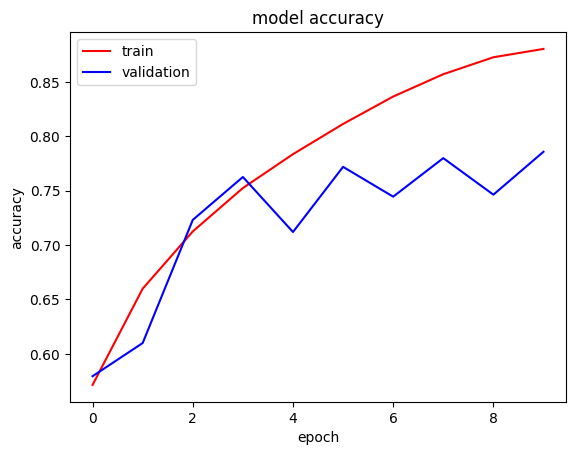

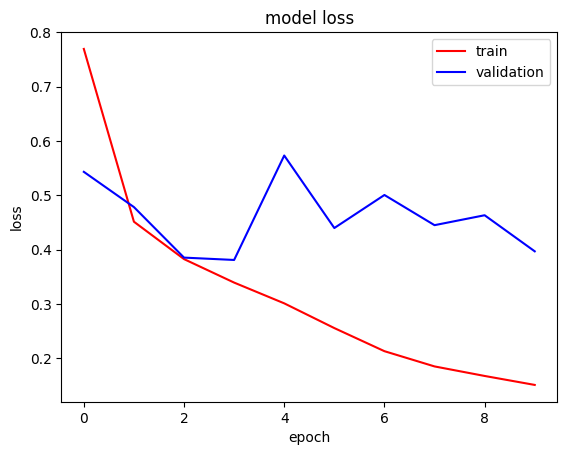

In [59]:
import matplotlib.pyplot as plt

plt.plot(model2_history.history['accuracy'],color='red',label='train')
plt.plot(model2_history.history['val_accuracy'],color='blue',label='validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(model2_history.history['loss'],color='red',label='train')
plt.plot(model2_history.history['val_loss'],color='blue',label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()


### Model 3 : Using Transfer Learning - Alexnet

In [63]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D
# Load the pre-trained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))



In [65]:
model3 = Sequential()

model3.add(densenet_model)# Add the pre-trained DenseNet model to the Sequential model
model3.add(GlobalAveragePooling2D())

# Add a fully connected layer with 256 units and ReLU activation
model3.add(Dense(256, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.summary()

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model3_history = model3.fit(train_ds,epochs=10,validation_data=validation_ds)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               262400    
                                                                 
 dense_12 (Dense)            (None, 3)                 771       
                                                                 
Total params: 7,300,675
Trainable params: 7,217,027
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/10
657/657 [==============================] - 388s 481ms/step - loss: 0.2108 - accuracy: 0.9208 -

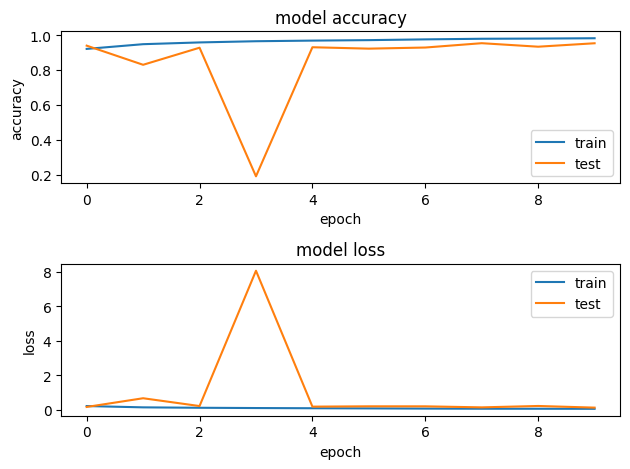

In [67]:

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


Image Prediction

1/1 [==============================] - 0s 44ms/step
cat


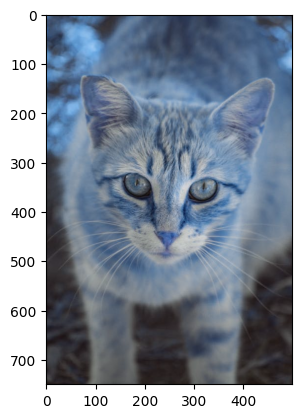

In [102]:
import cv2
test_img = cv2.imread('/content/pexels-photo-5292402.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
pred = model3.predict(test_input)
pred = np.reshape(pred, -1)
index = np.argmax(pred)
if index == 0 : print("cat")
elif index == 1 : print("dog")
else : print ("neither")

1/1 [==============================] - 0s 30ms/step
dog


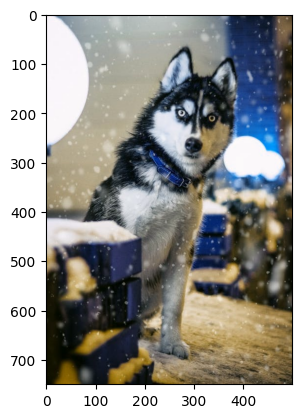

In [111]:
test_img = cv2.imread('/content/pexels-photo-2853422.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
pred = model3.predict(test_input)
pred = np.reshape(pred, -1)
index = np.argmax(pred)
if index == 0 : print("cat")
elif index == 1 : print("dog")
else : print ("neither")


















1/1 [==============================] - 0s 31ms/step
neither


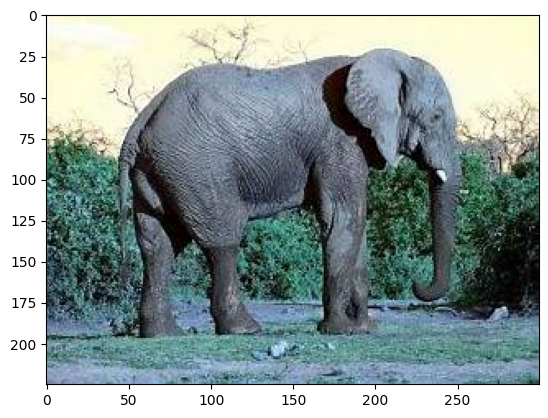

In [109]:
test_img = cv2.imread('/content/OIP--3aF2OpzGKcdI6FHil50qQHaFj.jpeg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
pred = model3.predict(test_input)
pred = np.reshape(pred, -1)
index = np.argmax(pred)
if index == 0 : print("cat")
elif index == 1 : print("dog")
else : print ("neither")